In [12]:
# !pip install deepface

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from deepface import DeepFace
import seaborn as sns

In [3]:
def reconstruction_accuracy(original_images, reconstructed_images, metric='cosine', model='ArcFace', generate_plot=False):
    distances = []
    threshold = 0
    for i in range(len(reconstructed_images)):
        res = DeepFace.verify(original_images[i], reconstructed_images[i], model_name=model, distance_metric=metric, enforce_detection=False)
        if i == 0:
            old = threshold
            threshold = res['threshold']
            if old != threshold:
                print('Threshold: ', threshold)

        distances.append(res['distance'])
    
    distances = np.array(distances)
    accuracy = np.mean(distances < threshold)
    print('Accuracy: ', accuracy)

    if generate_plot:
        sns.kdeplot(distances)
        plt.axvline(x=threshold, color='r', linestyle='--')
        plt.xlabel('{} Distance'.format(metric))
        plt.ylabel('Density')
        
        plt.show()
        


### Evaluation in case of normal reconstruction

In [10]:
result_path = ""
original_path = ""
result = np.load(result_path)
reconstructed_images = result['arr_0'] # reconstructed images obtained by sampling from model
original_images = [] # read images for original path

['arr_0', 'arr_1', 'arr_2']


Threshold:  0.68
Accuracy:  0.98


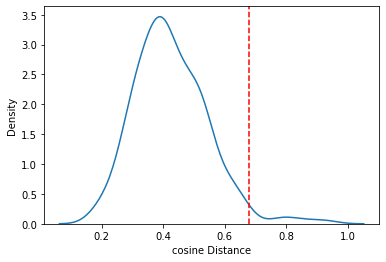

In [12]:
reconstruction_accuracy(original_images, reconstructed_images, metric='cosine', model='ArcFace', generate_plot=True)

### Evaluation in case of Warping Method

Type:  40_9_0 Mode:  test
Threshold:  0.68
Accuracy:  0.812


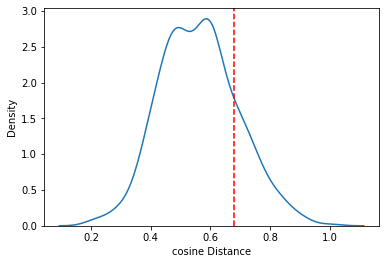

In [35]:
# types = ["0_0_3", "0_0_5", "0_0_7", "0_0_9"] #blur
# types = ["10_3_0", "10_6_0", "10_9_0", "20_3_0", "20_6_0", "20_9_0", "20_12_0", "20_16_0","40_3_0", "40_6_0", "40_9_0", "40_12_0", "40_16_0", "40_20_0", "40_25_0"] #warp
# modes = ["train", "test"]

types  = ["40_9_0"]
modes = ["test"]

sample = {'train':[], 'test':[]}

for mode in modes:
    for type in types:
        model_output = np.load('ffhq_warped_results/{}/{}/samples_500x64x64x3.npz'.format(type, mode))

        warped_images = model_output['arr_2']
        reconstructed_images = model_output['arr_0']

        warped_image_data = "ffhq_warped/{}/{}/images/".format(type, mode)
        original_image_data = "ffhq256_pp/{}/images/".format(mode)
        warped_image_files = os.listdir(warped_image_data)
        warped_image_files.sort()
        original_images = []

        for i in range(len(warped_images)):
            if warped_image_files[i] == '69090.png':
                original_image = cv2.imread('datasets/ffhq256/69090.png')
            else:
                original_image = cv2.imread(os.path.join(original_image_data, warped_image_files[i]))
            original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
            original_images.append(original_image)
        
        print('Type: ', type, 'Mode: ', mode)
        reconstruction_accuracy(original_images, reconstructed_images, metric='cosine', model='ArcFace', generate_plot=True)
    

Type:  40_12_0 Mode:  test
Threshold:  0.68
Accuracy:  0.528


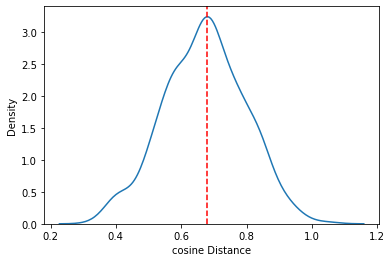

Type:  40_16_0 Mode:  test
Threshold:  0.68
Accuracy:  0.628


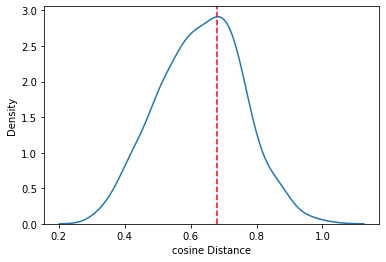

Type:  40_20_0 Mode:  test
Threshold:  0.68
Accuracy:  0.652


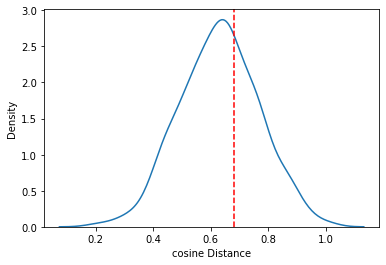

Type:  40_25_0 Mode:  test
Threshold:  0.68
Accuracy:  0.312


In [ ]:
# types = ["0_0_3", "0_0_5", "0_0_7", "0_0_9"] #blur
types = ["40_12_0", "40_16_0", "40_20_0", "40_25_0"] #warp
modes = ["test"]

sample = {'train':[], 'test':[]}

for mode in modes:
    for type in types:
        model_output = np.load('ffhq_warped_results/{}/{}/samples_500x64x64x3.npz'.format(type, mode))

        warped_images = model_output['arr_2']
        reconstructed_images = model_output['arr_0']

        warped_image_data = "ffhq_warped/{}/{}/images/".format(type, mode)
        original_image_data = "ffhq256_pp/{}/images/".format(mode)
        warped_image_files = os.listdir(warped_image_data)
        warped_image_files.sort()
        # warped_image_files.remove('69090.png')
        # print(len(warped_image_files), len(warped_images))
        original_images = []

        for i in range(len(warped_images)):
            original_image = cv2.imread(os.path.join(original_image_data, warped_image_files[i]))
            original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
            original_images.append(original_image)
        
        print('Type: ', type, 'Mode: ', mode)
        reconstruction_accuracy(original_images, reconstructed_images, metric='cosine', model='ArcFace', generate_plot=True)
    

Type:  40_12_0 Mode:  test
Threshold:  0.68
Accuracy:  0.528


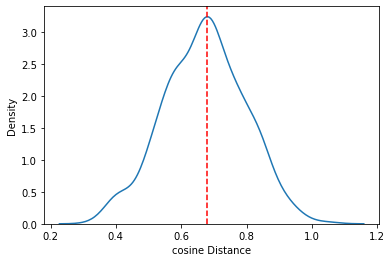

Type:  40_16_0 Mode:  test
Threshold:  0.68
Accuracy:  0.628


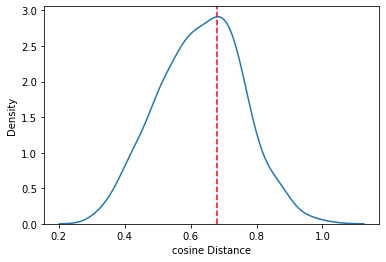

Type:  40_20_0 Mode:  test
Threshold:  0.68
Accuracy:  0.652


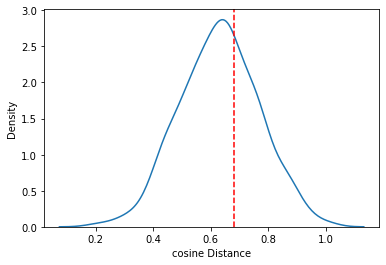

Type:  40_25_0 Mode:  test
Threshold:  0.68
Accuracy:  0.312


In [ ]:
# types = ["0_0_3", "0_0_5", "0_0_7", "0_0_9"] #blur
types = ["40_12_0", "40_16_0", "40_20_0", "40_25_0"] #warp
modes = ["test"]

sample = {'train':[], 'test':[]}

for mode in modes:
    for type in types:
        model_output = np.load('ffhq_warped_results/{}/{}/samples_500x64x64x3.npz'.format(type, mode))

        warped_images = model_output['arr_2']
        reconstructed_images = model_output['arr_0']

        warped_image_data = "ffhq_warped/{}/{}/images/".format(type, mode)
        original_image_data = "ffhq256_pp/{}/images/".format(mode)
        warped_image_files = os.listdir(warped_image_data)
        warped_image_files.sort()
        # warped_image_files.remove('69090.png')
        # print(len(warped_image_files), len(warped_images))
        original_images = []

        for i in range(len(warped_images)):
            original_image = cv2.imread(os.path.join(original_image_data, warped_image_files[i]))
            original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
            original_images.append(original_image)
        
        print('Type: ', type, 'Mode: ', mode)
        reconstruction_accuracy(original_images, reconstructed_images, metric='cosine', model='ArcFace', generate_plot=True)
    

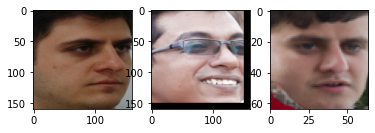

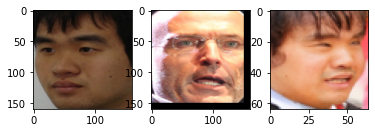

In [ ]:
# Visualize the reconstruction
visualize_reconstruction(original_images, reconstructed_images, warped_images, n=2)

Accuracy:  0.5897435897435898


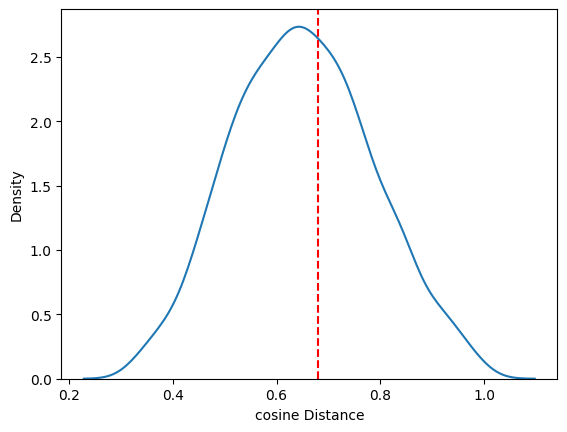

In [ ]:
# Calculate the accuracy of the reconstruction
reconstruction_accuracy(original_images, reconstructed_images, metric='cosine', model='ArcFace', generate_plot=True)